### Construct simulation network (09/10 meeting)

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_runner import plot_results, run_simulation, load_params

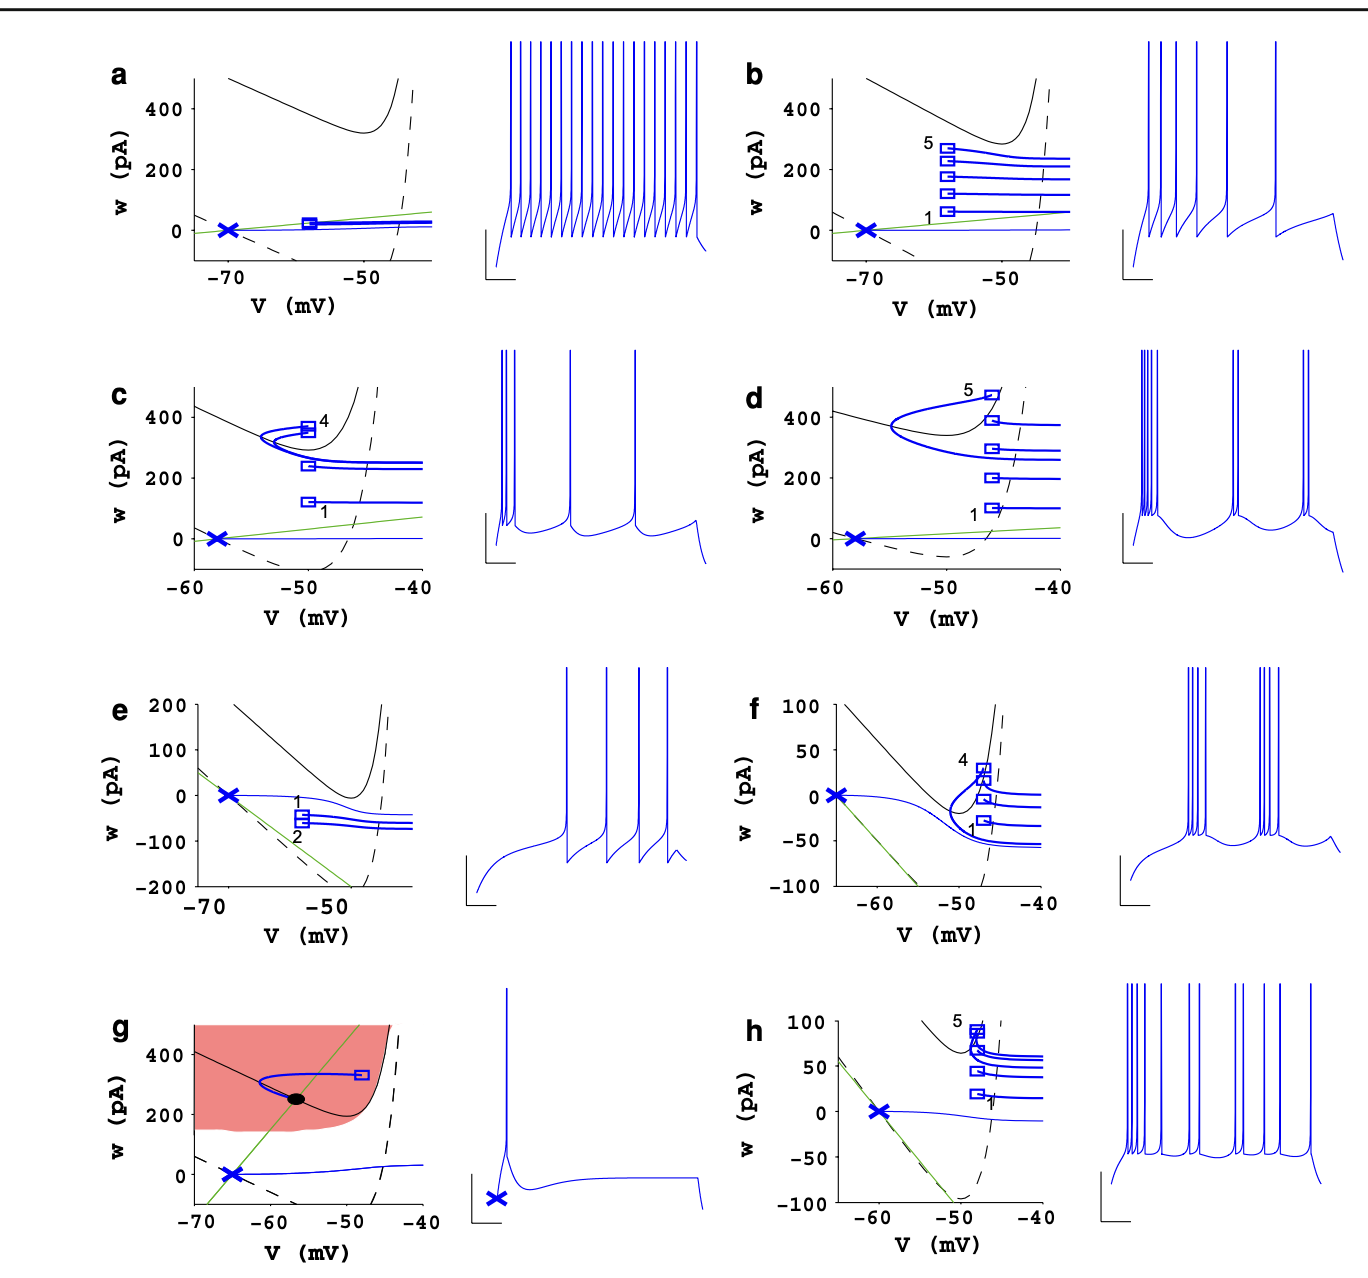

- V-nullcline: can determine Vt and leak conductance 

- a (tonic firing): absence of threshold voltage(low tauw, b = 0)
    - regular discharge of action potentials, constant spiking 
- b (adaptation): k value affects the first inter-spike intervals (high tauw than a)
    - increase interval because of frequency adaptation 
- c (initial burst): initial spike intensively generated, spiking starts with one or several sharp reset followed by broad reset (low C, high gL, EL) 


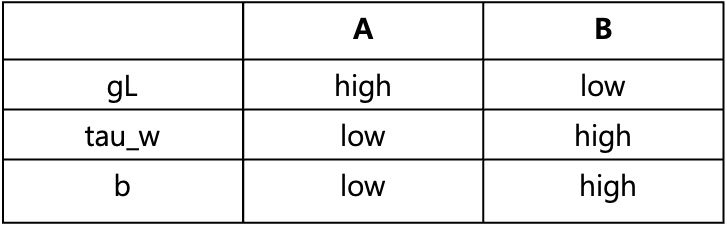

<Figure size 1500x800 with 0 Axes>

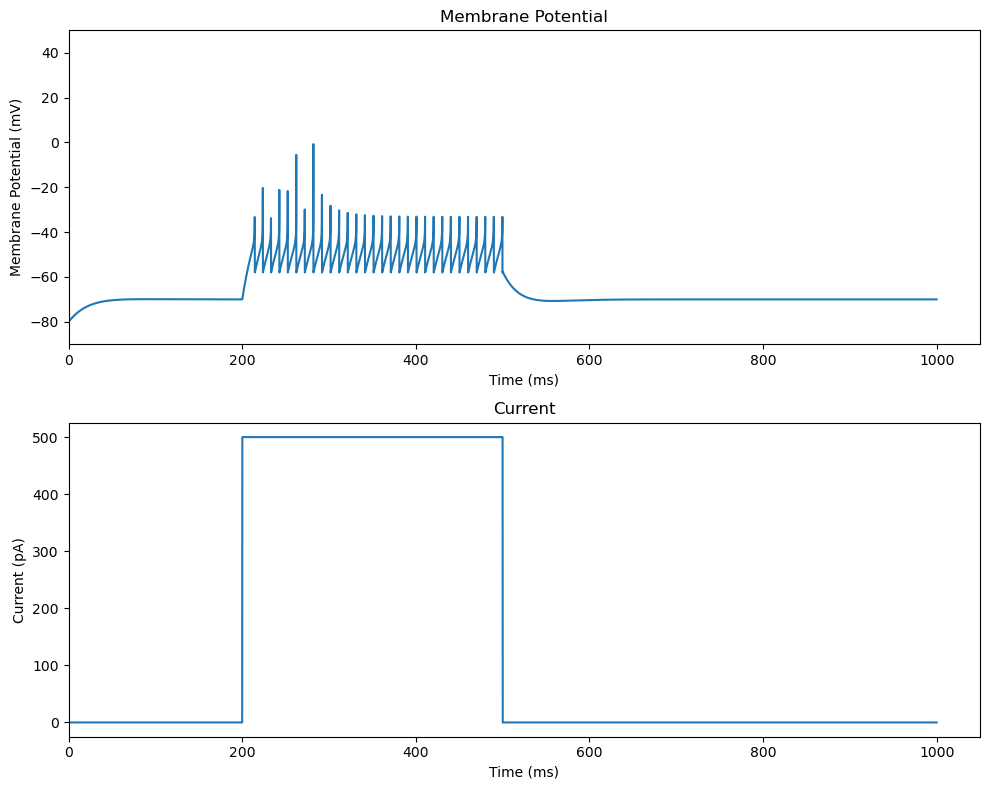

In [3]:
### AdEx simulation with various parameter in Fig 4
json_file = './params/AdEx_4a.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

<Figure size 1500x800 with 0 Axes>

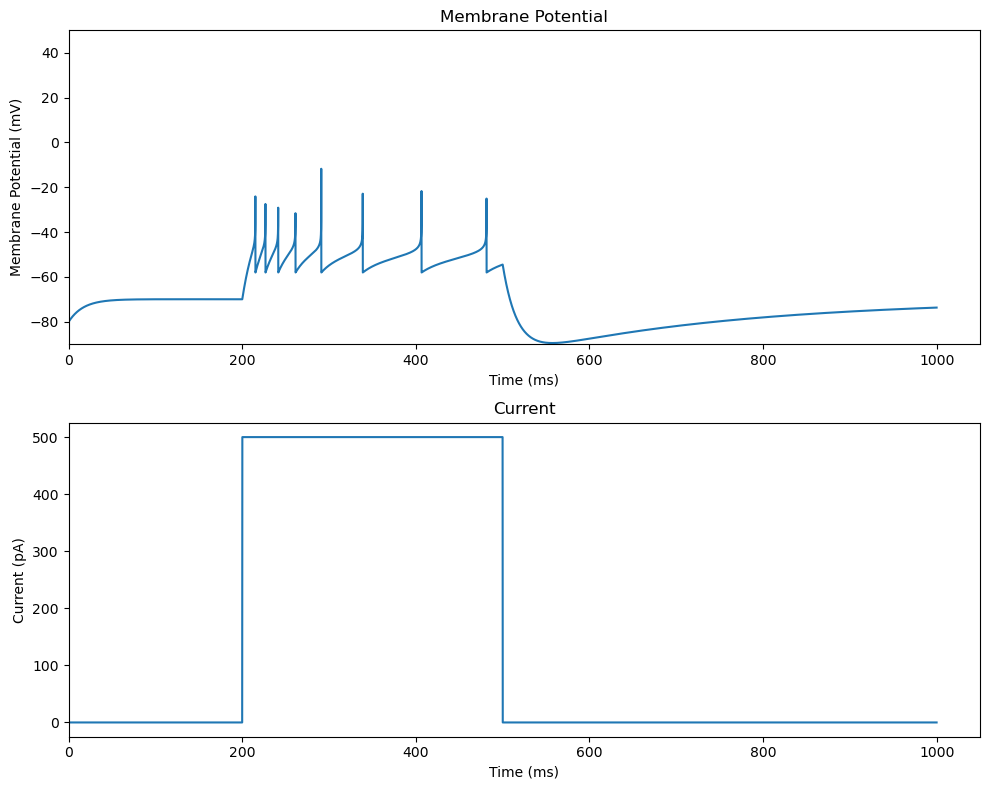

In [4]:
### AdEx simulation with various parameter in Fig 4
json_file = './params/AdEx_4b.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

<Figure size 1500x800 with 0 Axes>

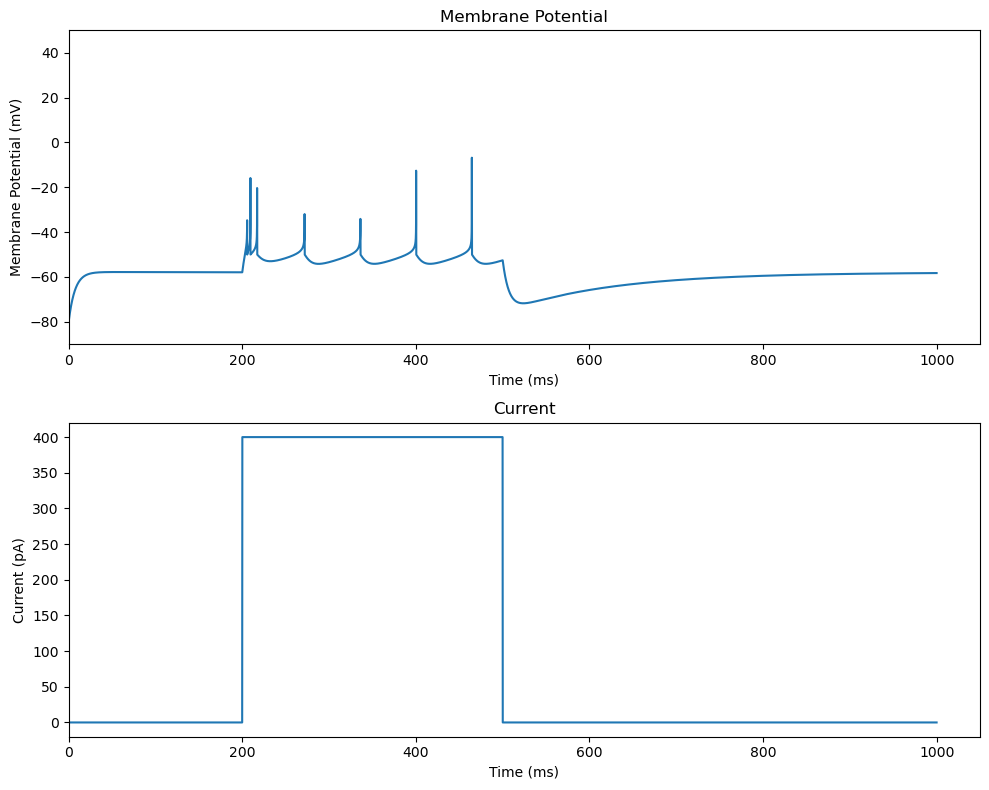

In [5]:
### AdEx simulation with various parameter in Fig 4
json_file = './params/AdEx_4c.json' 

# load parameters
params, model_name = load_params(json_file)
N = params.pop('N')['value'] 

# simulation 
results = run_simulation(N, params, model_name)

# visualization
plot_results(results)

### Add dynamics for threshold 
 $$
\text{th} = \text{clip}(\text{th} + \text{rand}() \times 0.2\,\text{mV} - 0.1\,\text{mV}, 0.1\,\text{mV}, 0.9\,\text{mV})
$$



In [2]:
from simulation_I import run_simulation, load_params, plot_results

- Compare results based on FSN regarding threshold

![FSN](../figure/FSN_dth.png)

WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -60. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 30. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'I' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 60. The internal variable will be used. 

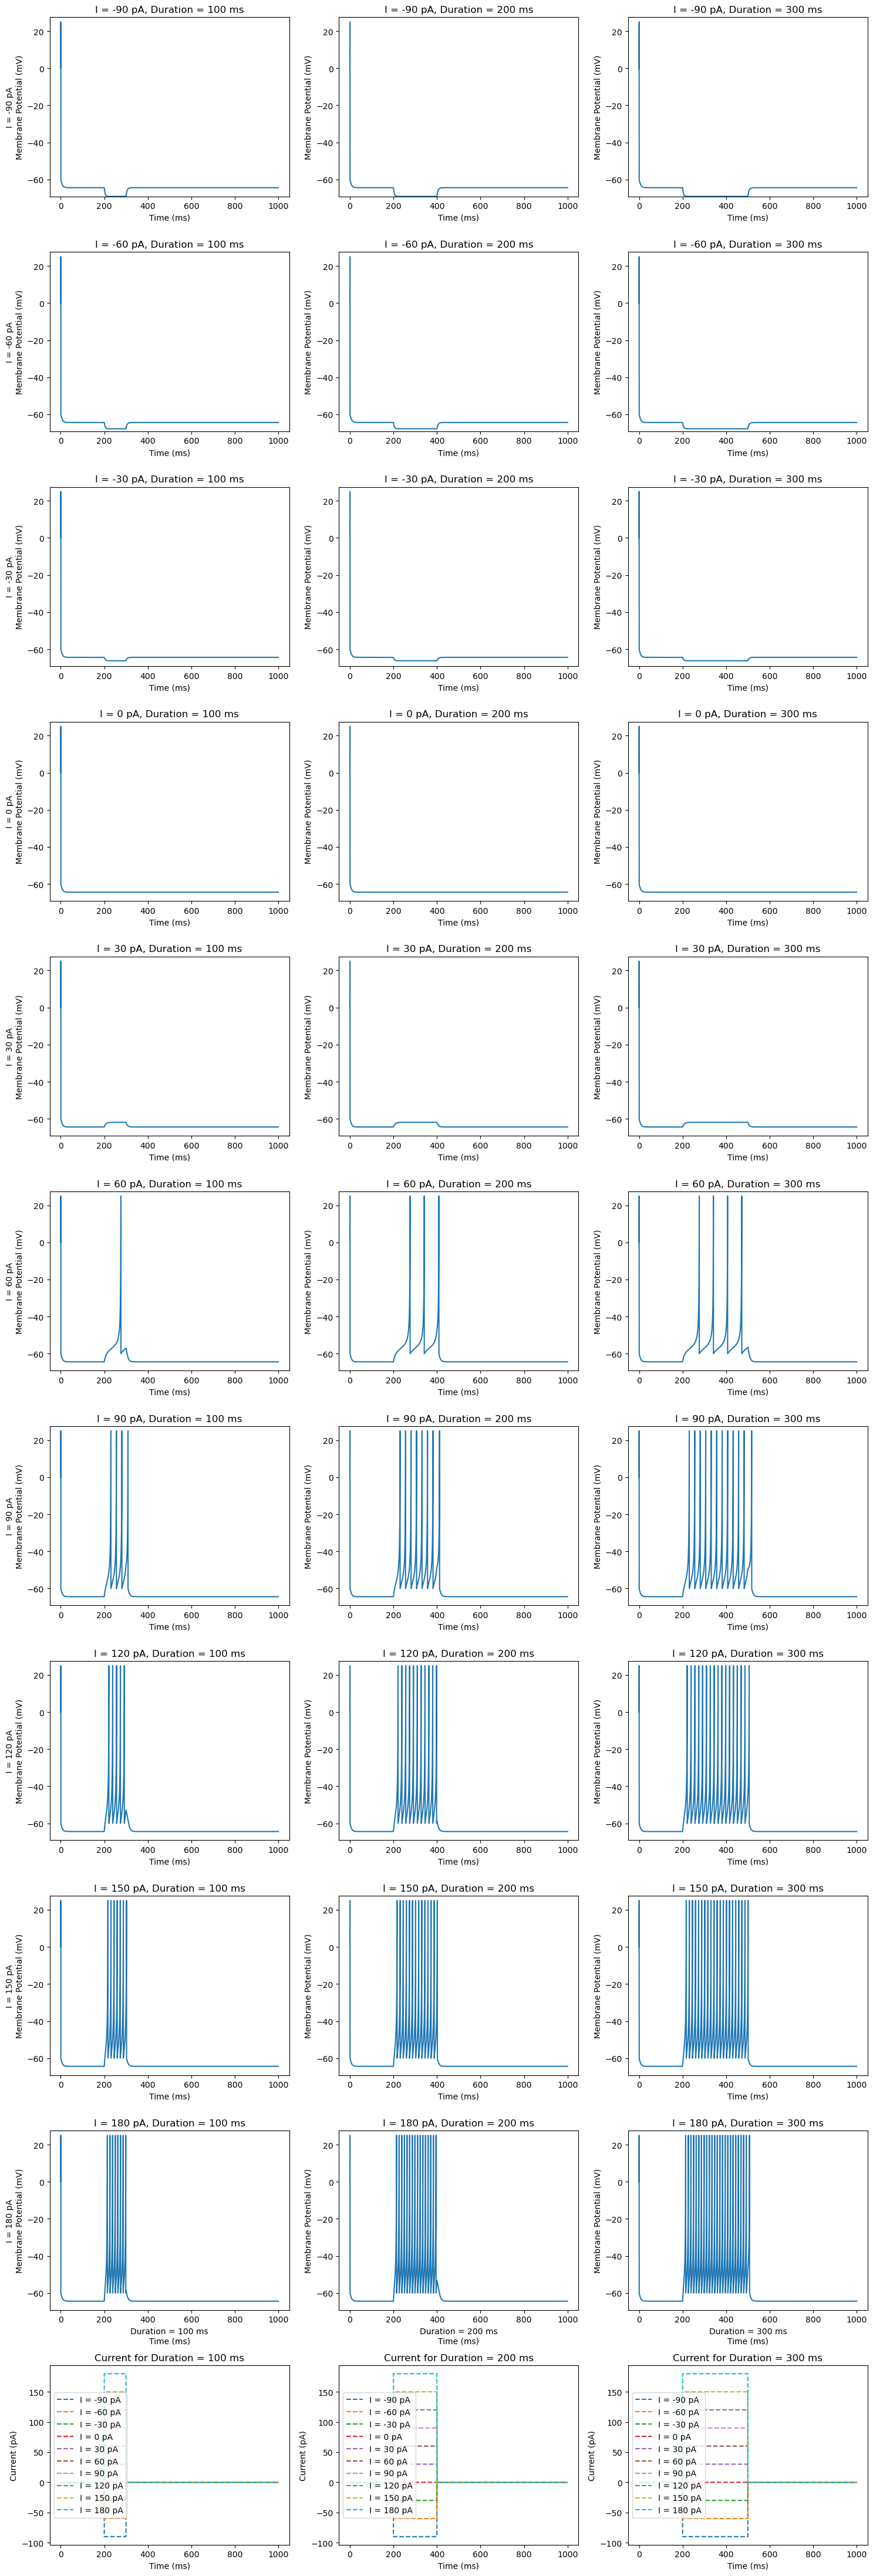

In [4]:
json_file = './params_ref/FSN_1.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

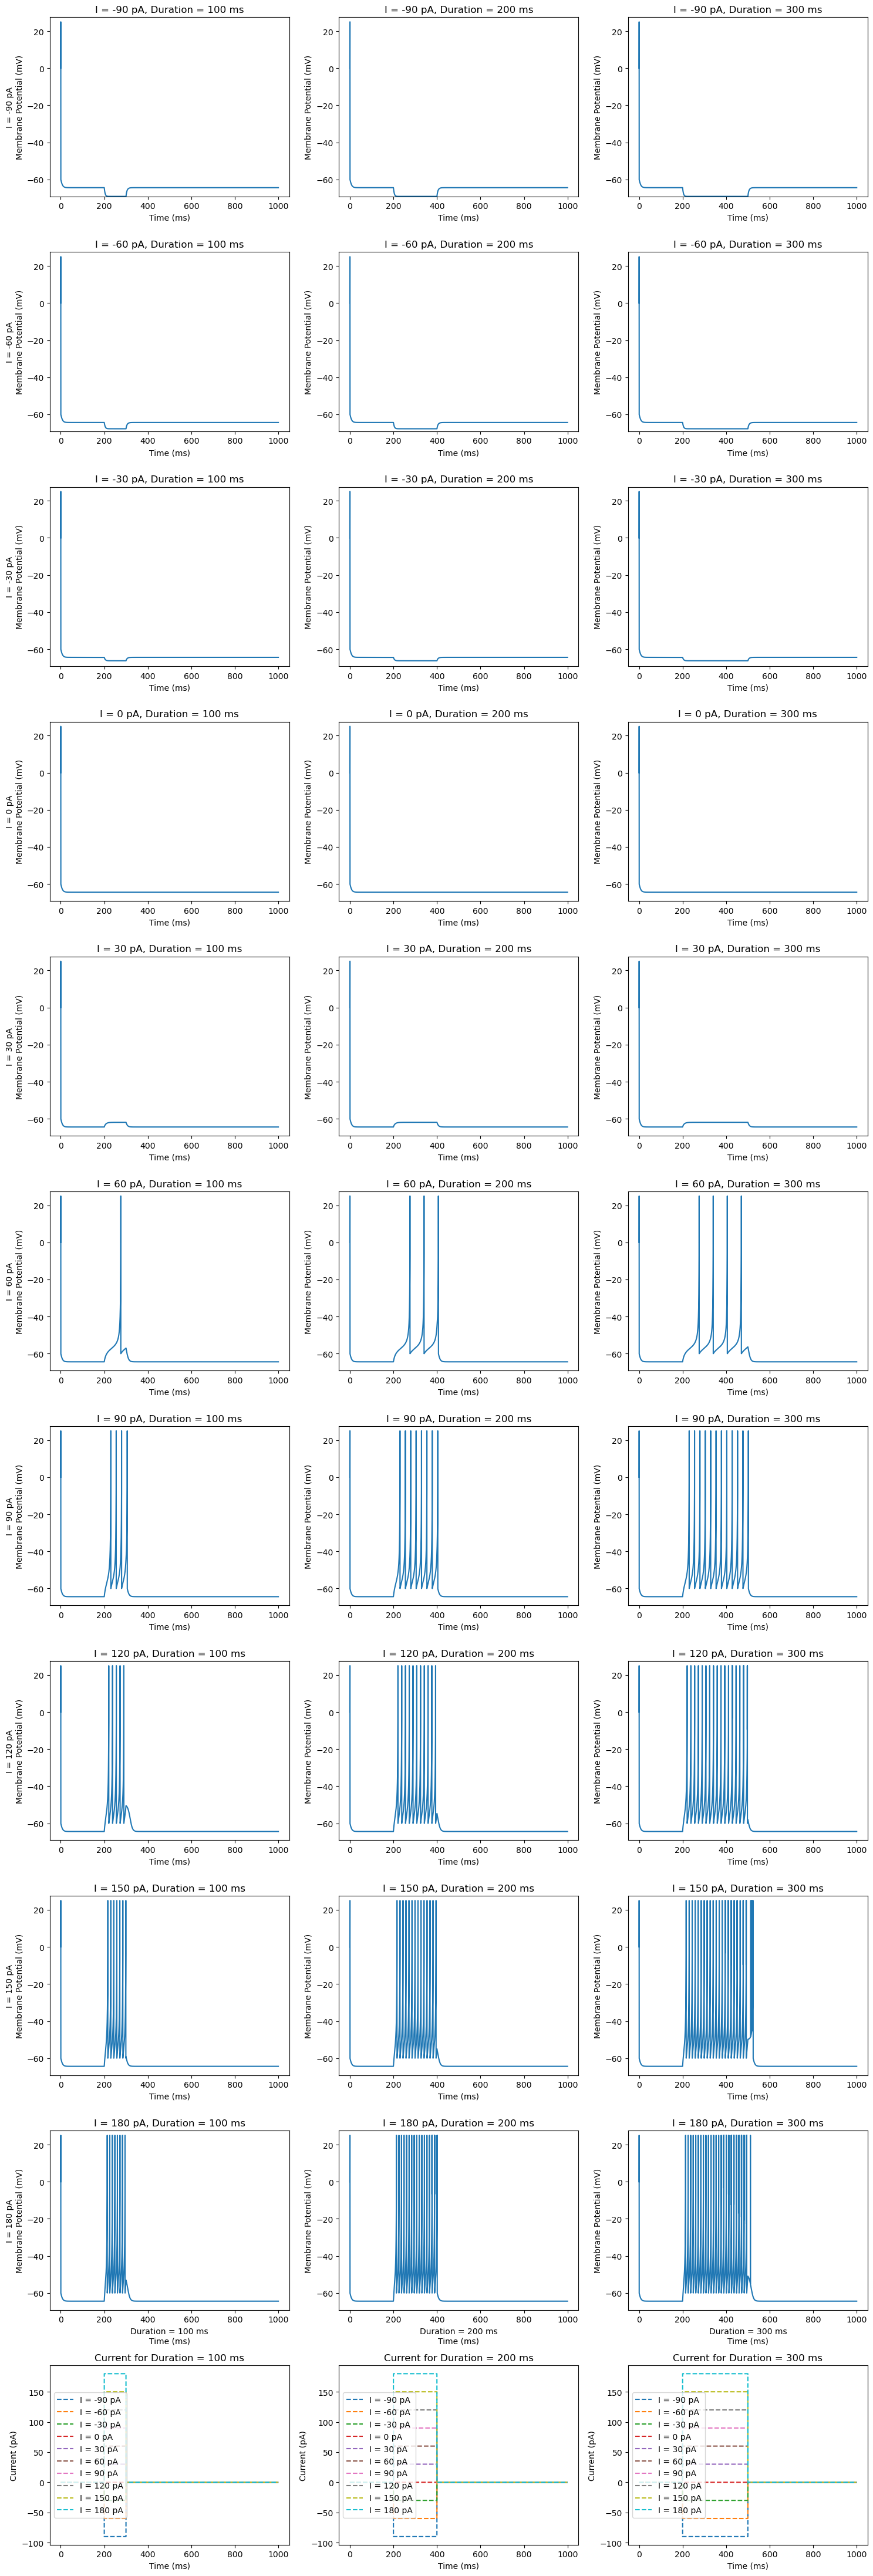

In [5]:
json_file = './params_ref/FSN_1_dynamic_th.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

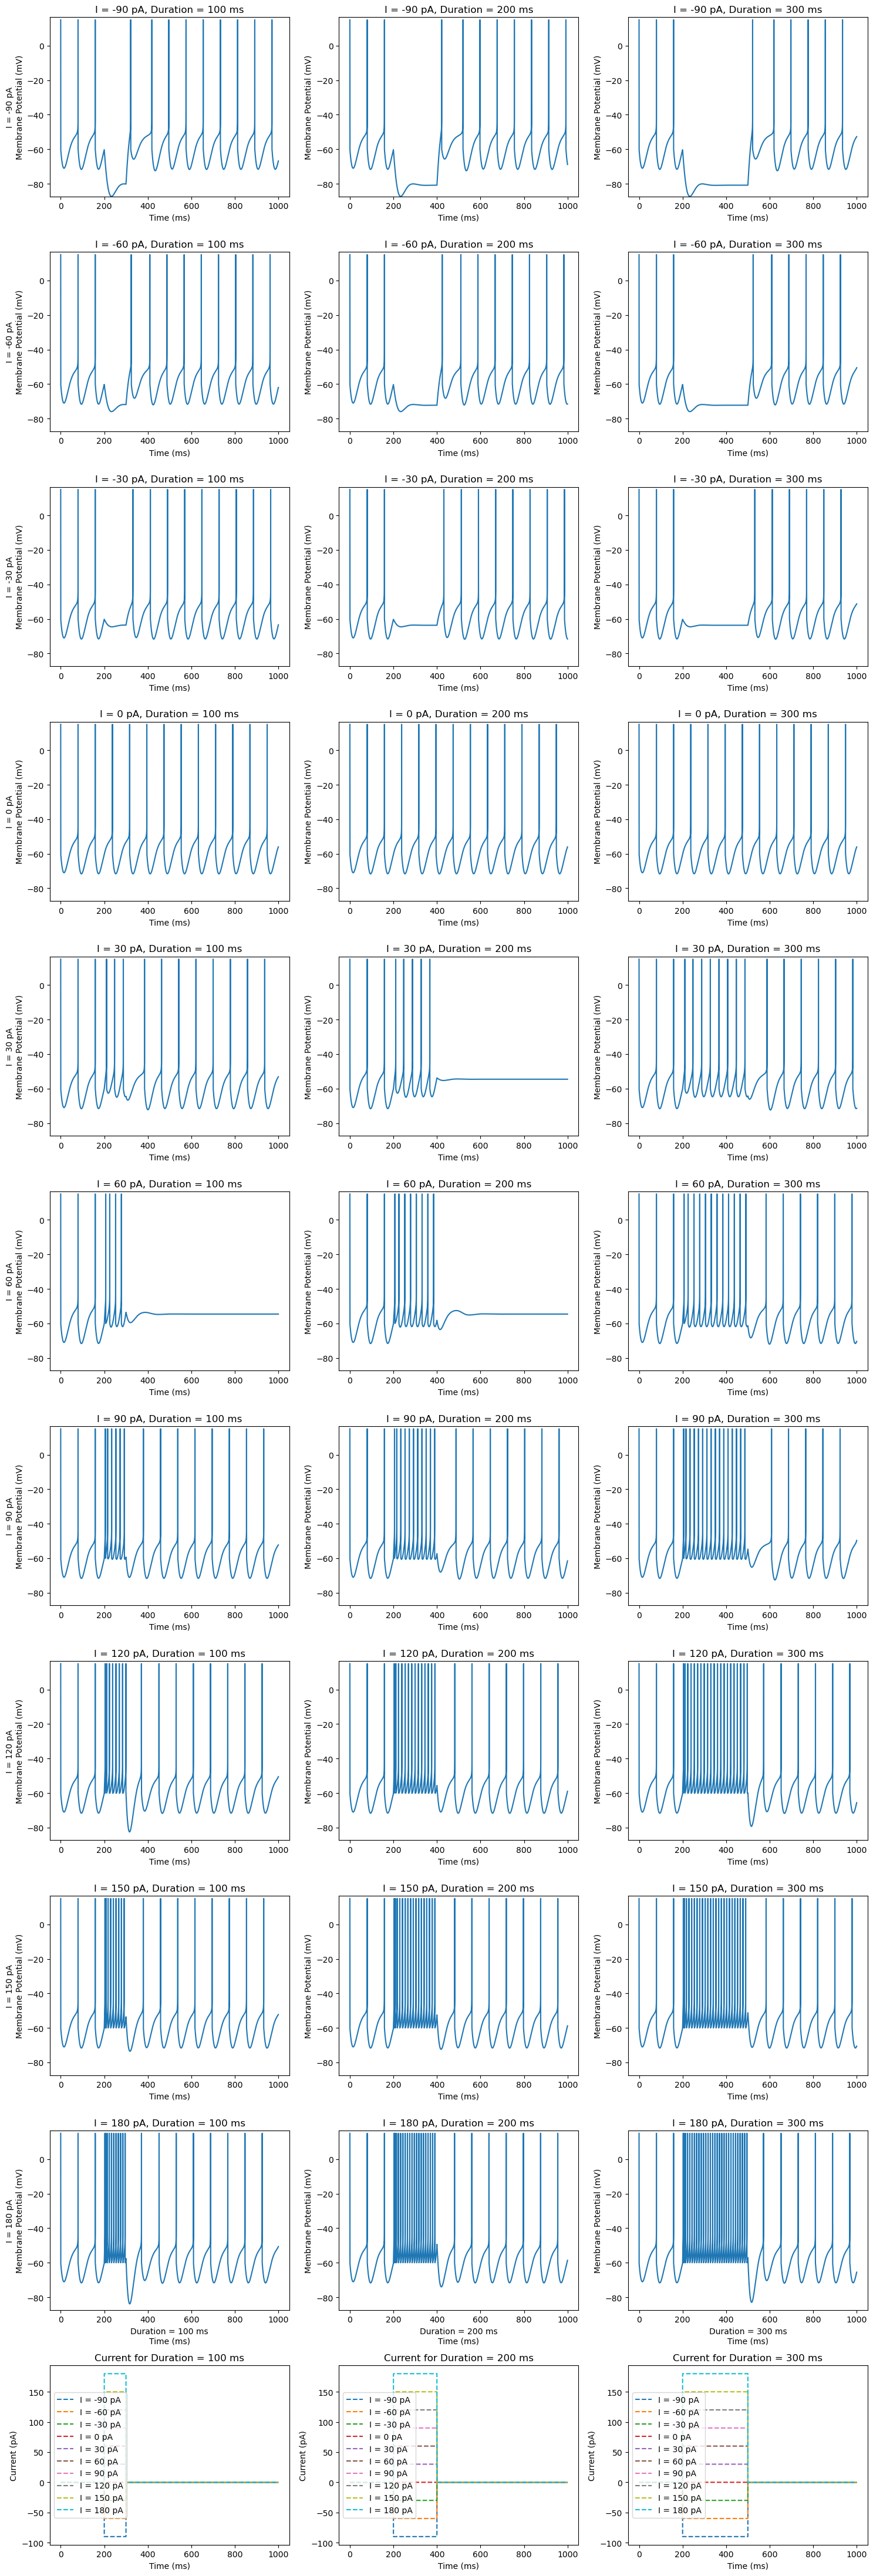

In [7]:
json_file = './params_ref/GPe_T1_1_dynamic_th.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

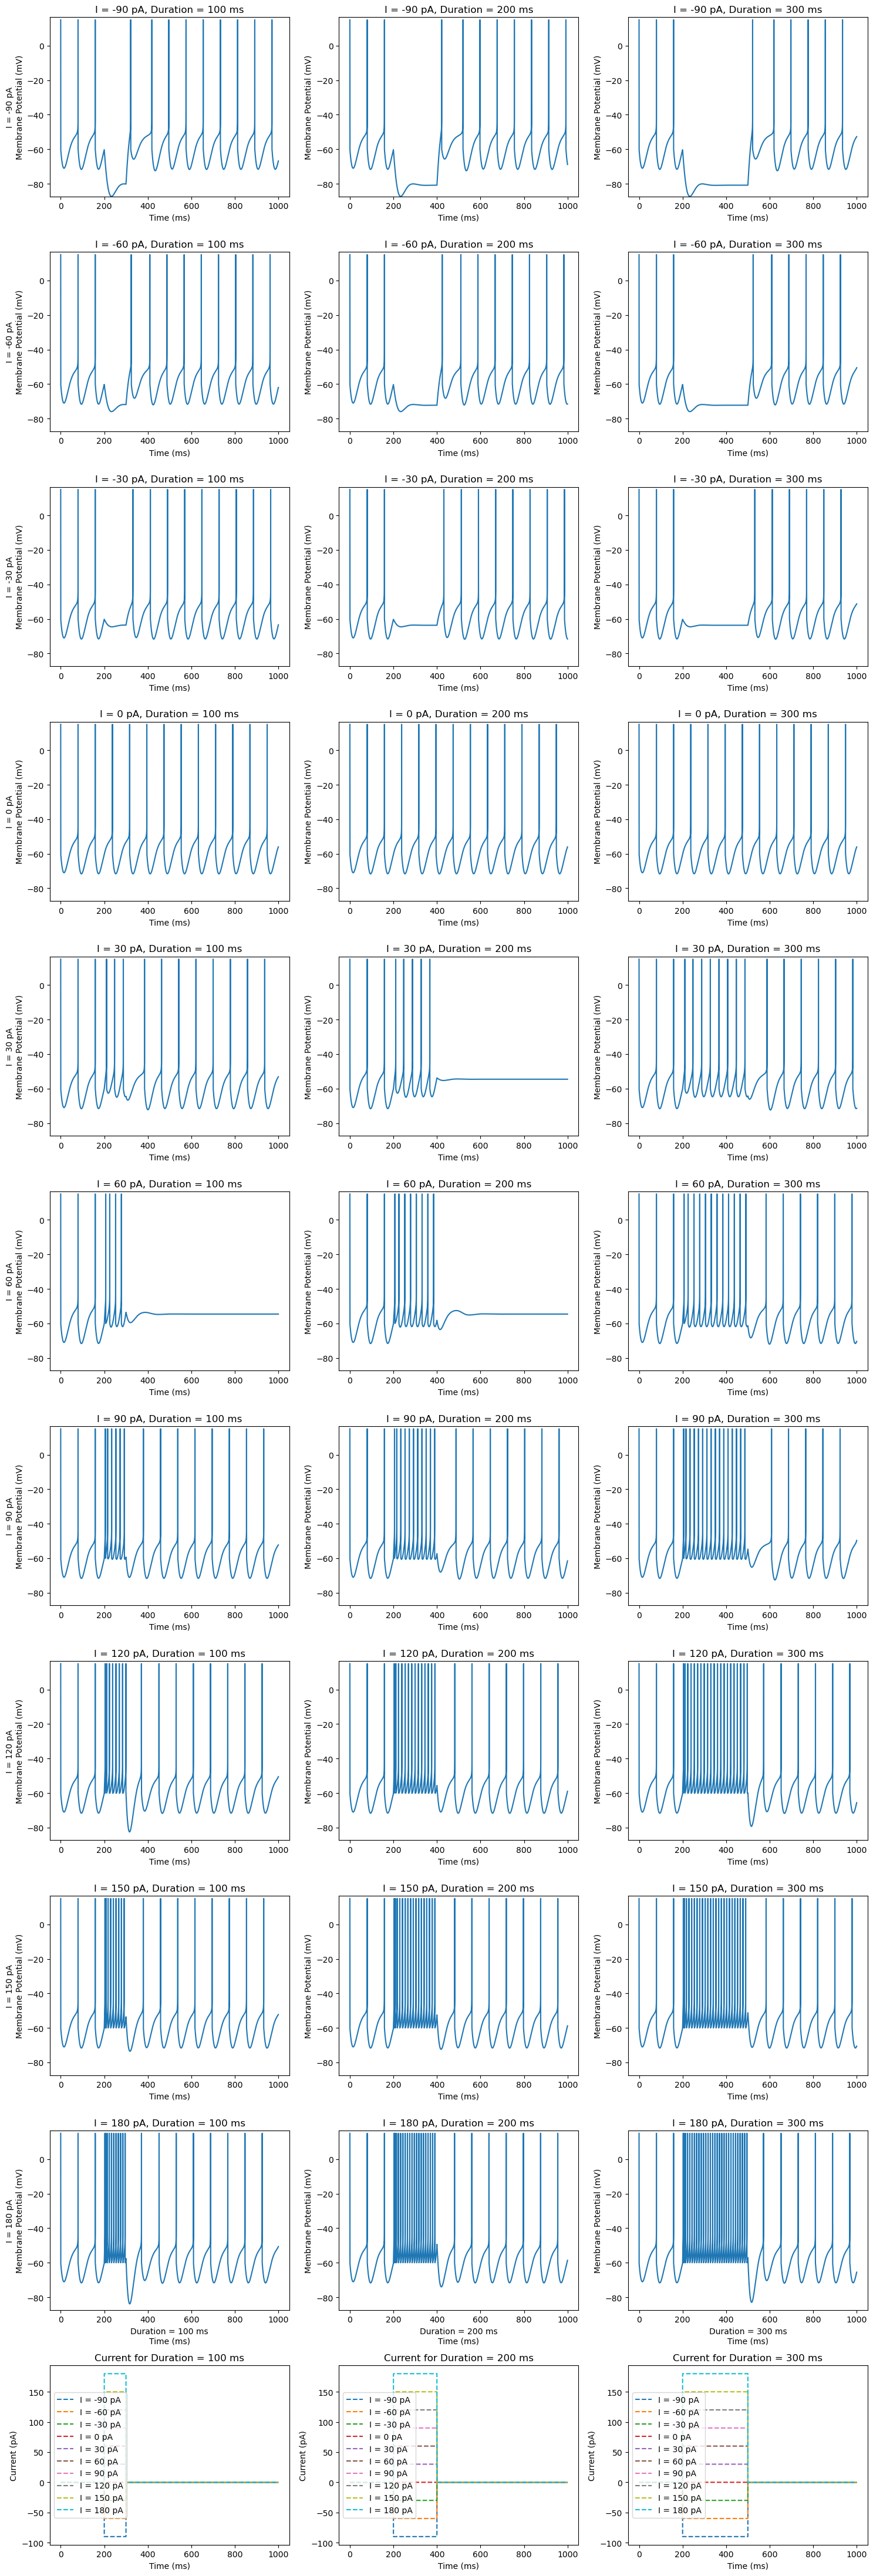

In [8]:
json_file = './params_ref/GPe_TA_1_dynamic_th.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

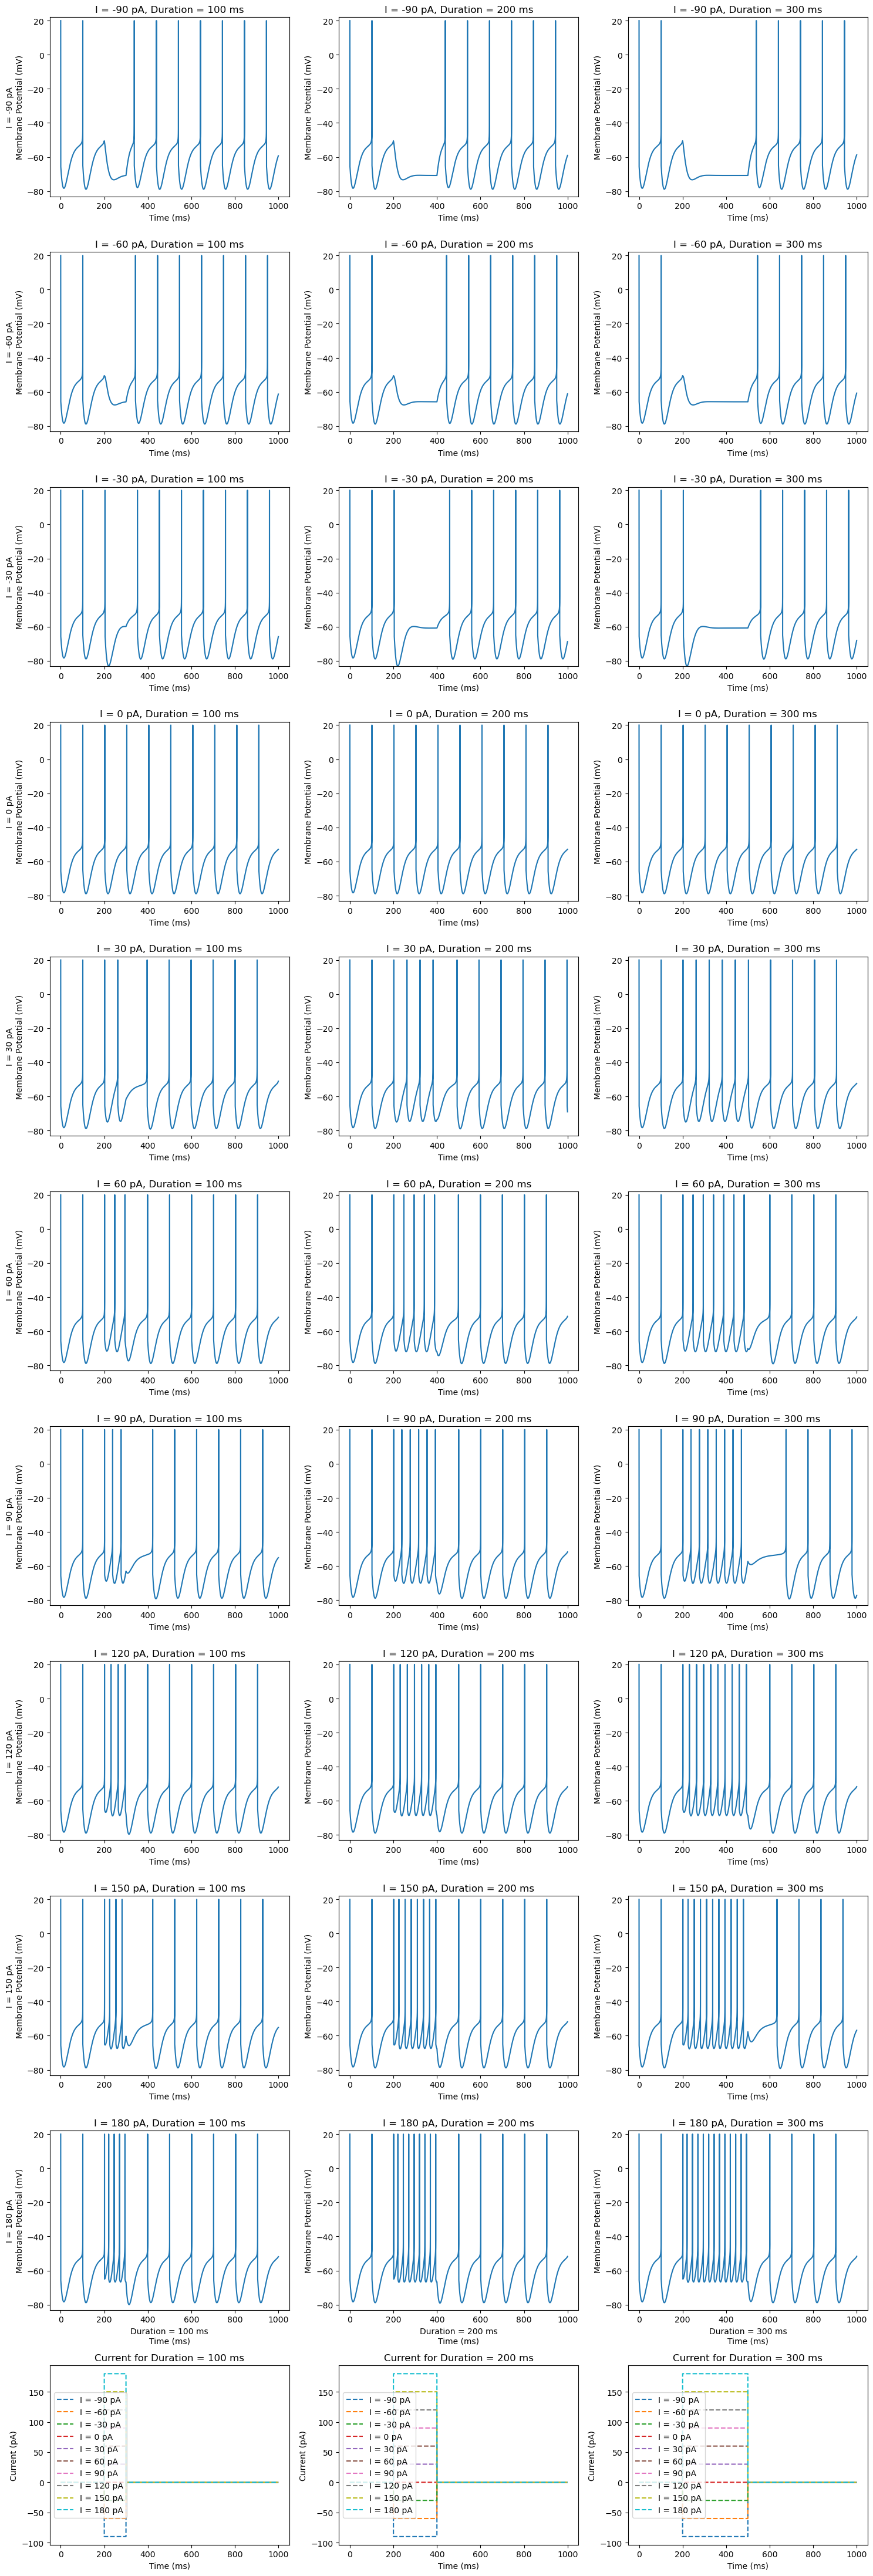

In [9]:
json_file = './params_ref/SNr_1_dynamic_th.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

### Noise

- Given the noisy nature of neuronal activity in vivo, neurons receive noisy time varying inputs.
- Gausian noise 
- https://brian2.readthedocs.io/en/stable/user/models.html

$$E[\xi(t)] = \mu = 0,$$

$$E[\xi(t) \xi(t + \tau)] = \sigma_\xi^2 \delta(\tau),$$


In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plt
import random
import numpy as np
import json

from simulation_I_noise import run_simulation, load_params, plot_results

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_m462sswx
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

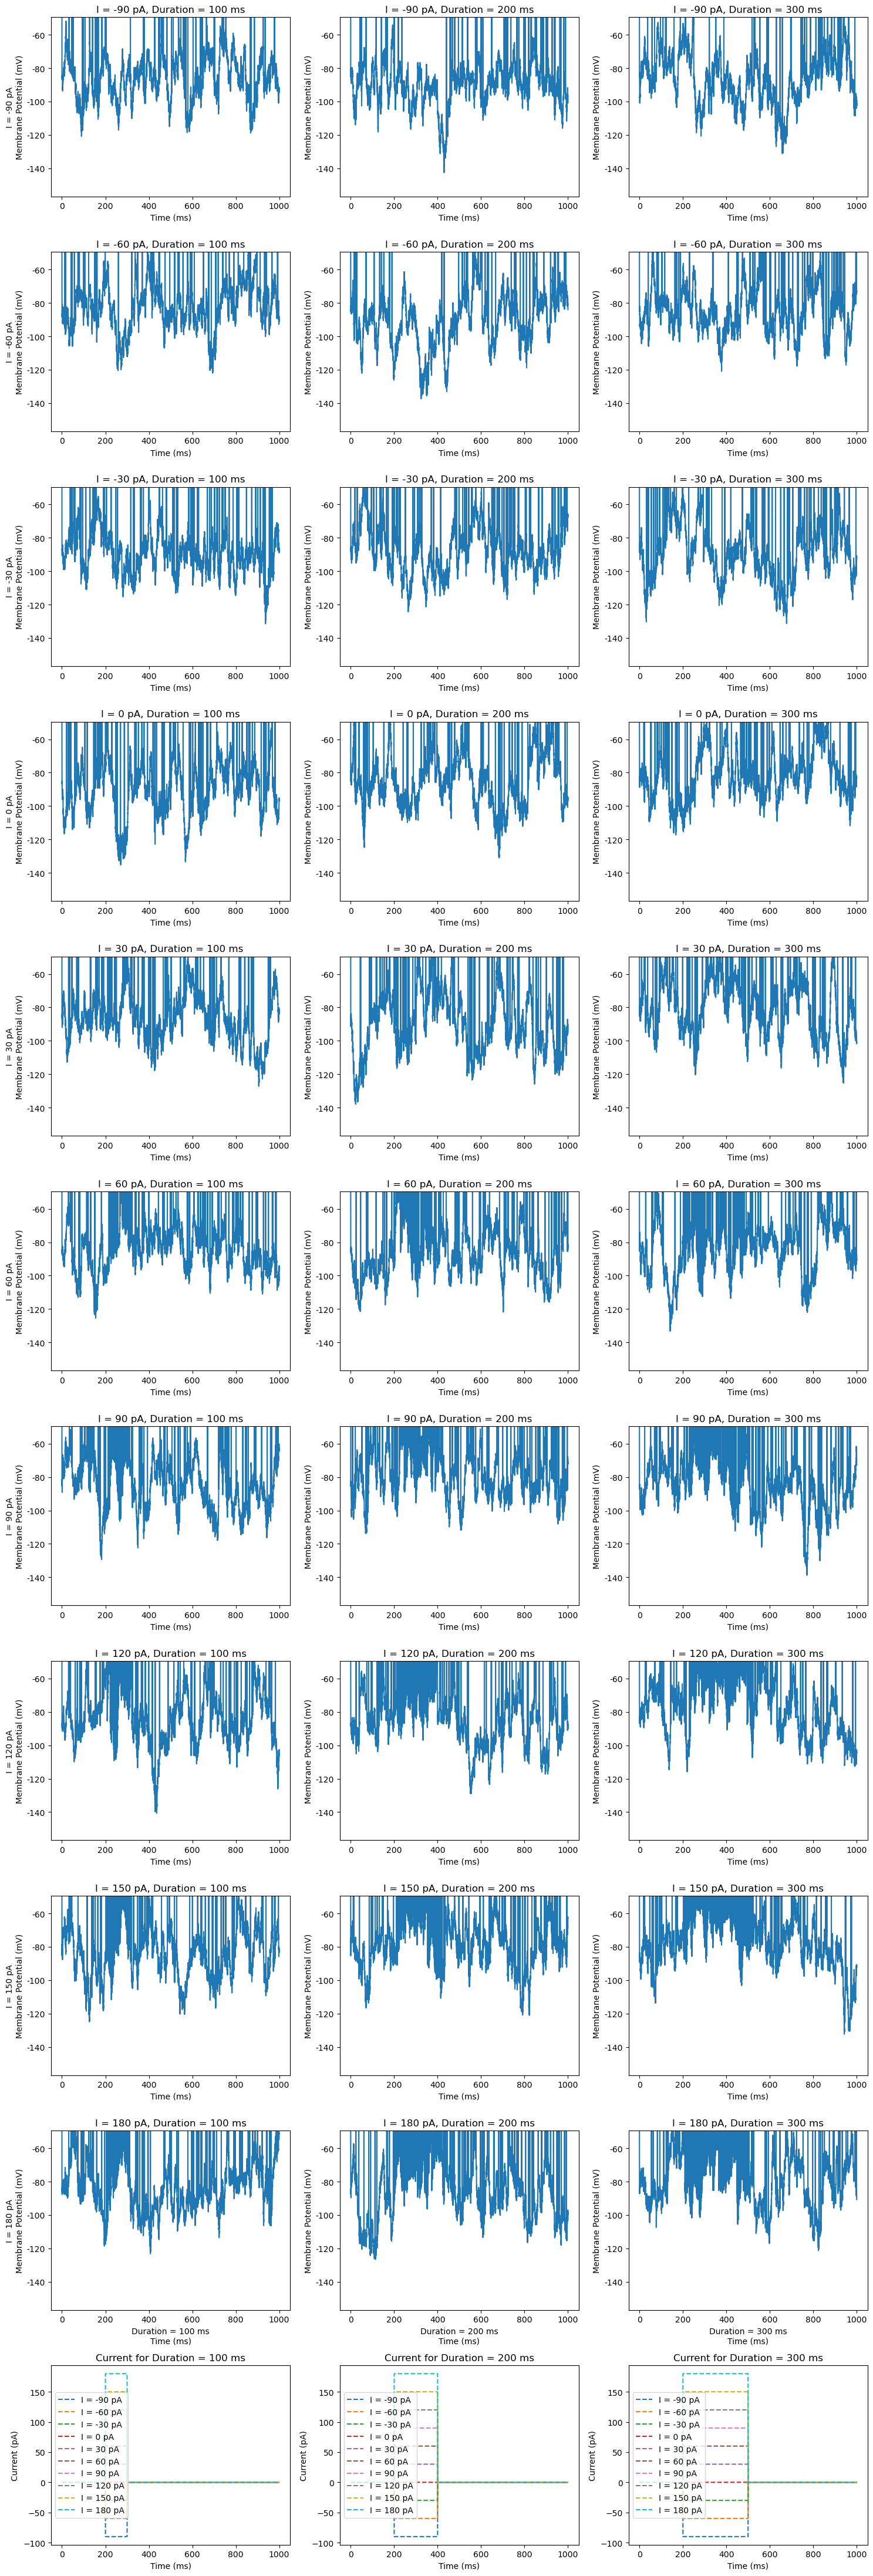

In [2]:
# Gaussian white noise (GWN) current 
 
json_file = './params/LIF_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_xk6m453o
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

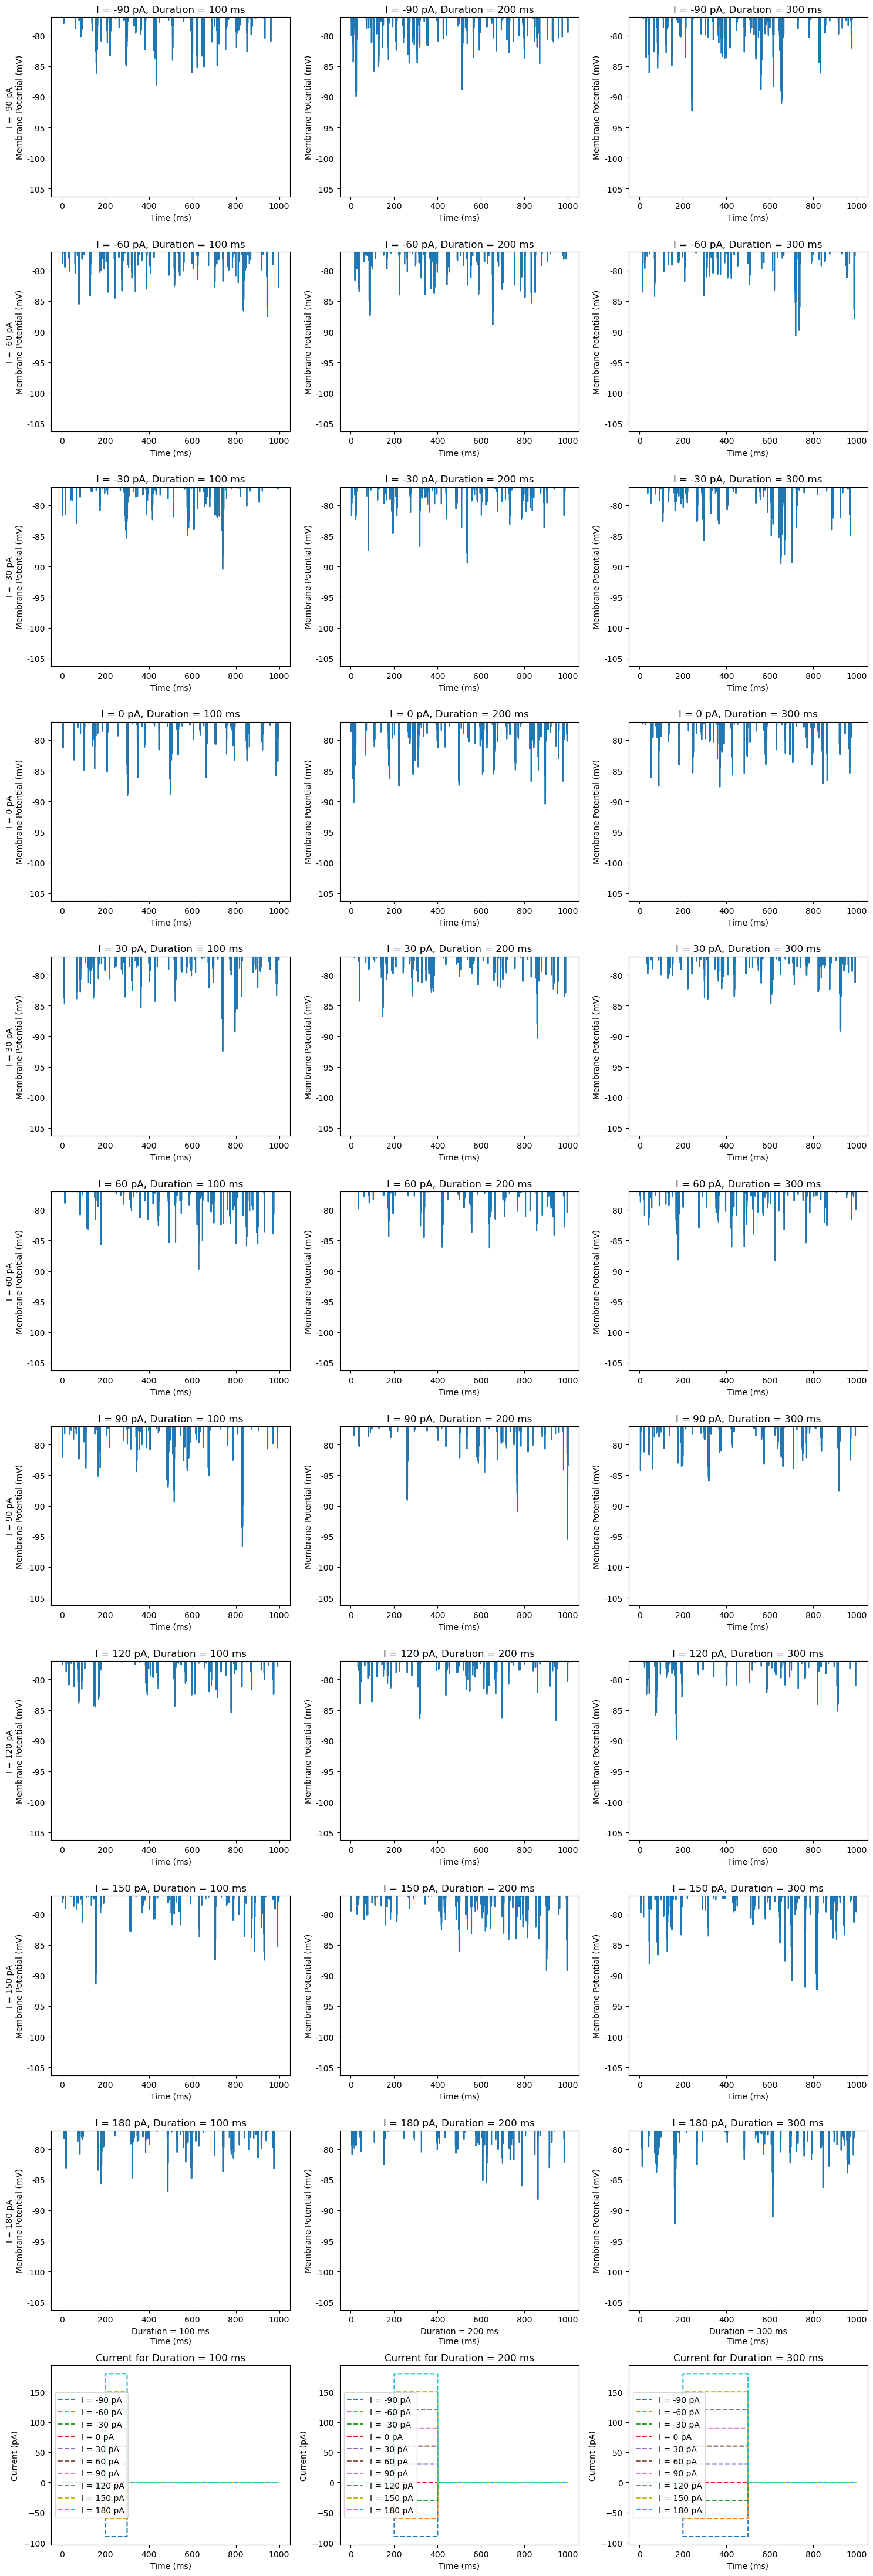

In [2]:
# Gaussian white noise (GWN) current 

json_file = './params/AdEx_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  
I_values = [-90, -60, -30, 0, 30, 60, 90, 120, 150, 180]
durations = [100, 200, 300]  

# Run simulation
all_results, all_currents, total_time, injection_times = run_simulation(
    N, params, model_name, I_values, durations, injection_start_time = 200 * ms
)
# Plot results
plot_results(all_results, all_currents, I_values, total_time, injection_times, durations)

<Figure size 1500x800 with 0 Axes>

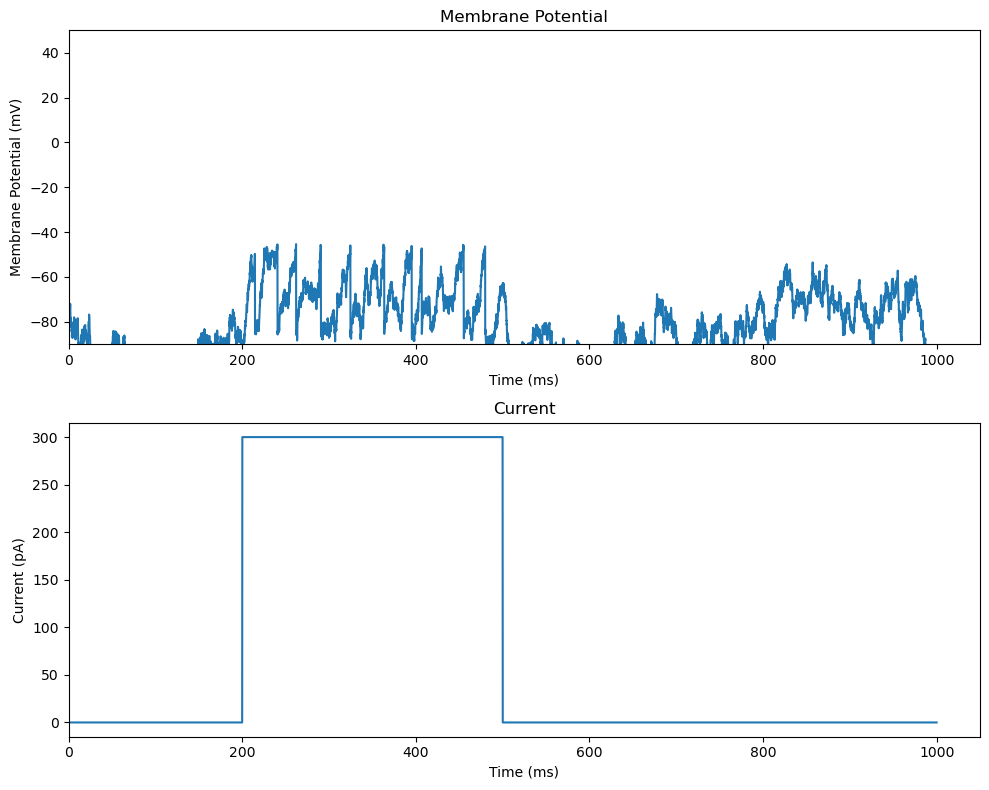

In [4]:
# GWN with LIF model 
from simulation_runner import plot_results, run_simulation_noise, load_params

json_file = './params/LIF_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  

# simulation 
results, noise_data = run_simulation_noise(N, params, model_name)

# visualization
plot_results(results)

#### Firing rate and spike time irregularity (Future work)
Plotting the output firing rate as a function of GWN mean or DC value, it is called the input-output transfer function of the neuron (F-I curve).

Spike regularity can be quanitfied as **coefficient of variance of the inter-spike-interval**:
\begin{align}
\text{CV}_{\text{ISI}} = \frac{std(\text{isi})}{mean(\text{isi})}
\end{align}

*isi* can be calculate by using np.diff with spike_time

For completely irregular spiking (i.e. a Poisson Point process) $\textbf{CV}_{\textbf{ISI}} \textbf{= 1}$. And for a clock like process because *std(isi)* is zero $\textbf{CV}_{\textbf{ISI}} \textbf{= 0}$. 

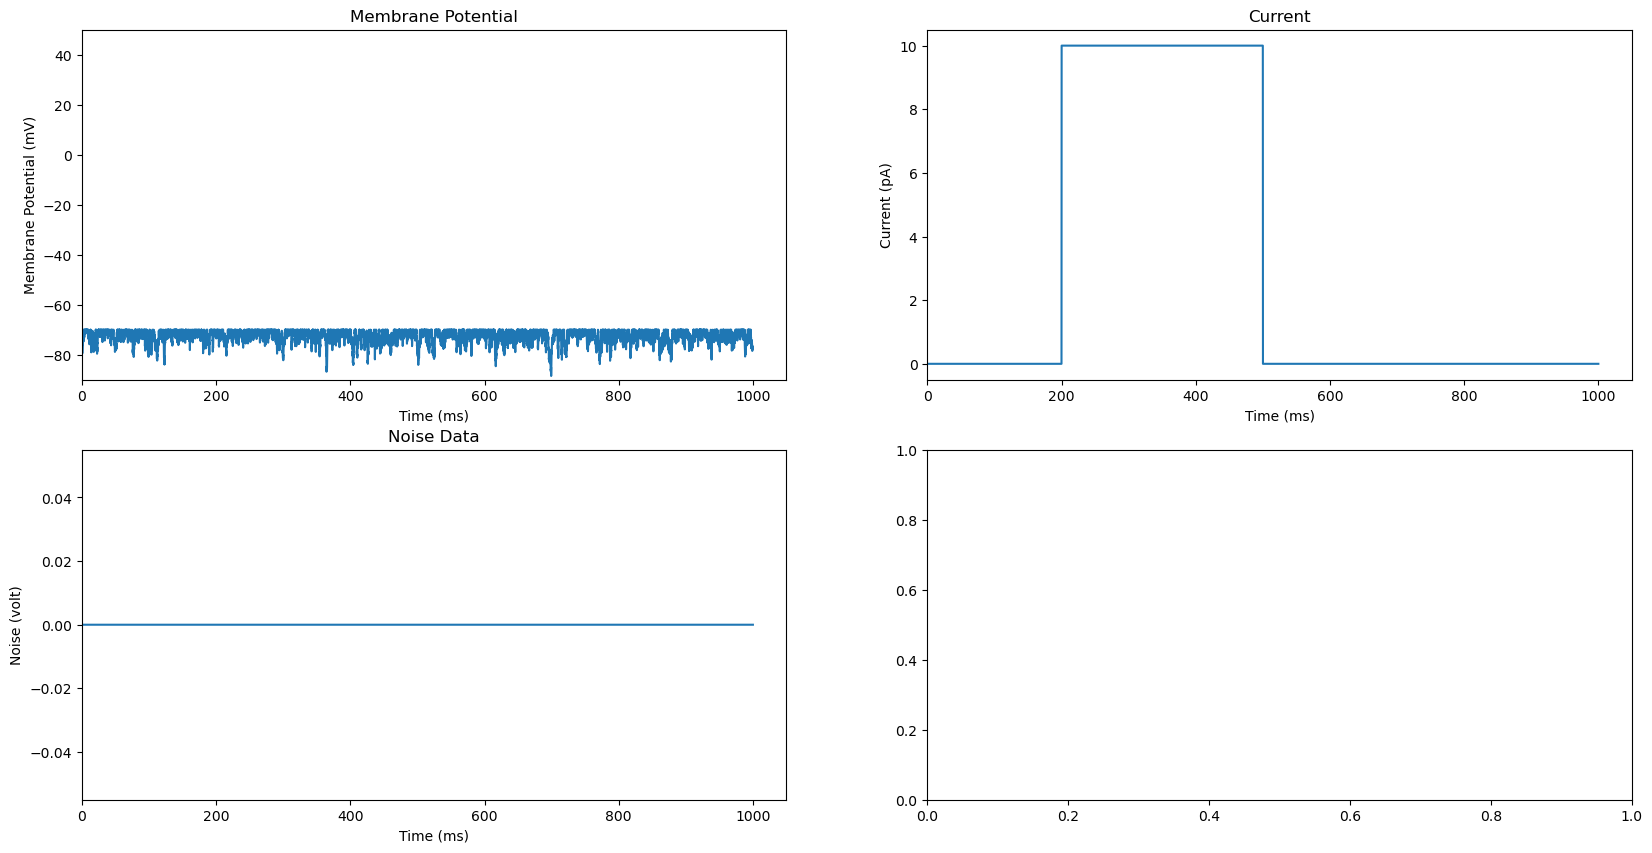

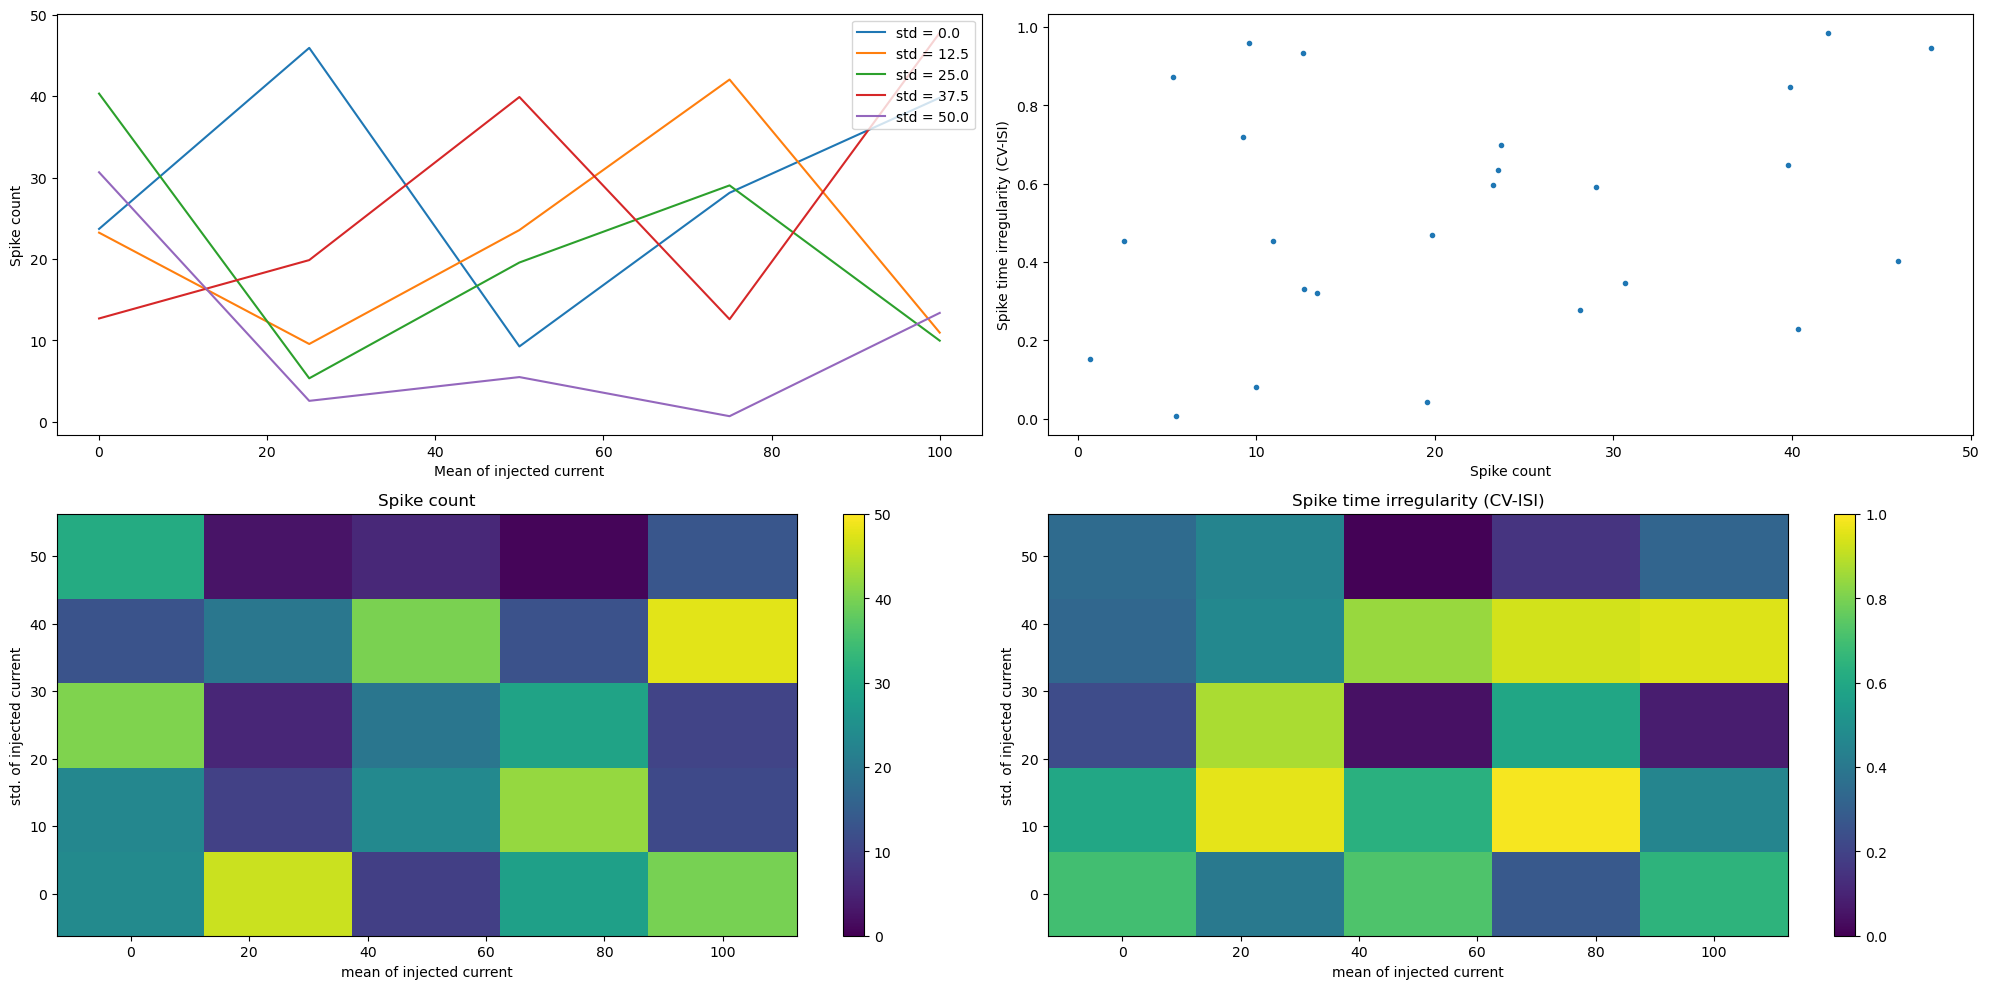

In [1]:
from simulation_runner import plot_results_noise_FI, run_simulation_noise, load_params

json_file = './params/AdEx_noise.json'  

# Load parameters
params, model_name = load_params(json_file)

N = params.pop('N')['value']  

# simulation 
results, noise_data = run_simulation_noise(N, params, model_name)

# visualization
plot_results_noise_FI(results, noise_data)

### Synapse connection results

{'g_L': 10. * nsiemens, 'E_L': -80.2 * mvolt, 'Delta_T': 16.2 * mvolt, 'vt': -64. * mvolt, 'vr': -70. * mvolt, 'tau_w': 0.333 * second, 'th': 15. * mvolt, 'a': 300. * psiemens, 'd': 50. * famp, 'C': 60. * pfarad, 'I': 50. * pamp}


INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.07s). [brian2.stateupdaters.base.method_choice]


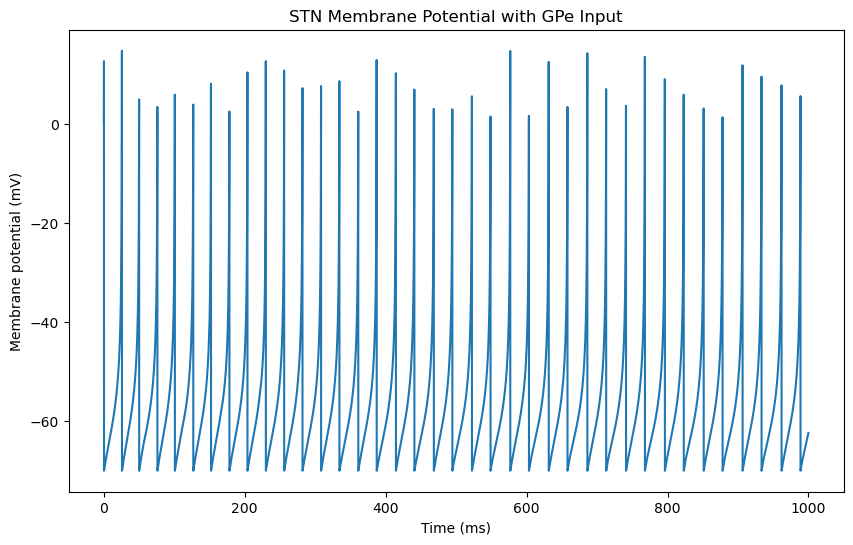

In [1]:
### GPe(T1 - STN)

from simulation_runner_syn import run_simulation, plot_results
from brian2 import *

# Define paths to parameter files
gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'

synapse_params = {
    'w': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV,
    'delay': 1*ms
}

# Run simulation with specified N for each neuron group
N_GPe = 30  # Number of GPe neurons
N_STN = 30   # Number of STN neurons

results = run_simulation(
    N_GPe, 
    N_STN, 
    gpe_params_file, 
    stn_params_file, 
    synapse_params, 
    'GPe', 
    'STN', 
    'GPe_STN'
)

plot_results(results)

INFO       No numerical integration method specified for group 'synapses_1', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]


{'g_L': 10. * nsiemens, 'E_L': -80.2 * mvolt, 'Delta_T': 16.2 * mvolt, 'vt': -64. * mvolt, 'vr': -70. * mvolt, 'tau_w': 0.333 * second, 'th': 15. * mvolt, 'a': 300. * psiemens, 'd': 50. * famp, 'C': 60. * pfarad, 'I': 50. * pamp}


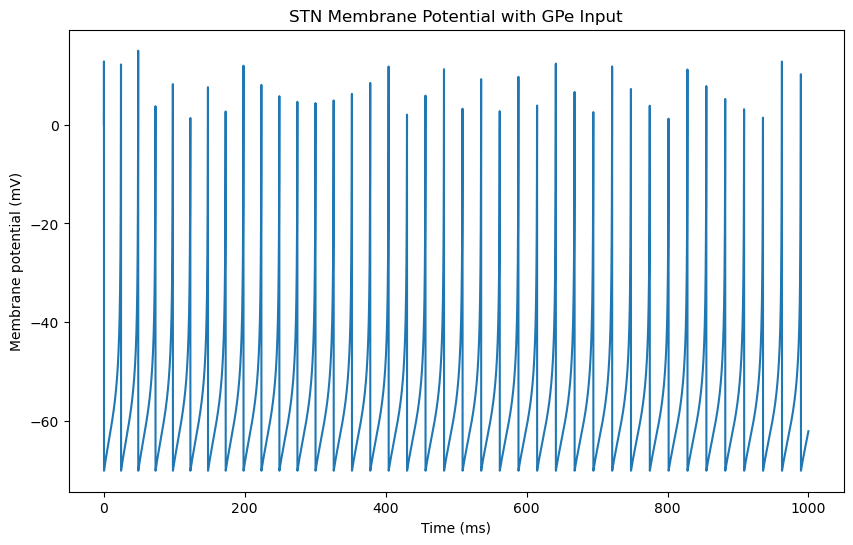

In [2]:
### GPe(TA - STN)
gpe_params_file = './params_ref/GPe_TA_3.json'
stn_params_file = './params_ref/STN_1.json'

# Define synapse parameters
synapse_params = {
    'w': 0*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV,
    'delay': 1*ms
}

# Run simulation with specified N for each neuron group
N_GPe = 30  # Number of GPe neurons
N_STN = 30   # Number of STN neurons

results = run_simulation(
    N_GPe, 
    N_STN, 
    gpe_params_file, 
    stn_params_file, 
    synapse_params, 
    'GPe', 
    'STN', 
    'GPe_STN'
)

plot_results(results)

INFO       No numerical integration method specified for group 'synapses', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


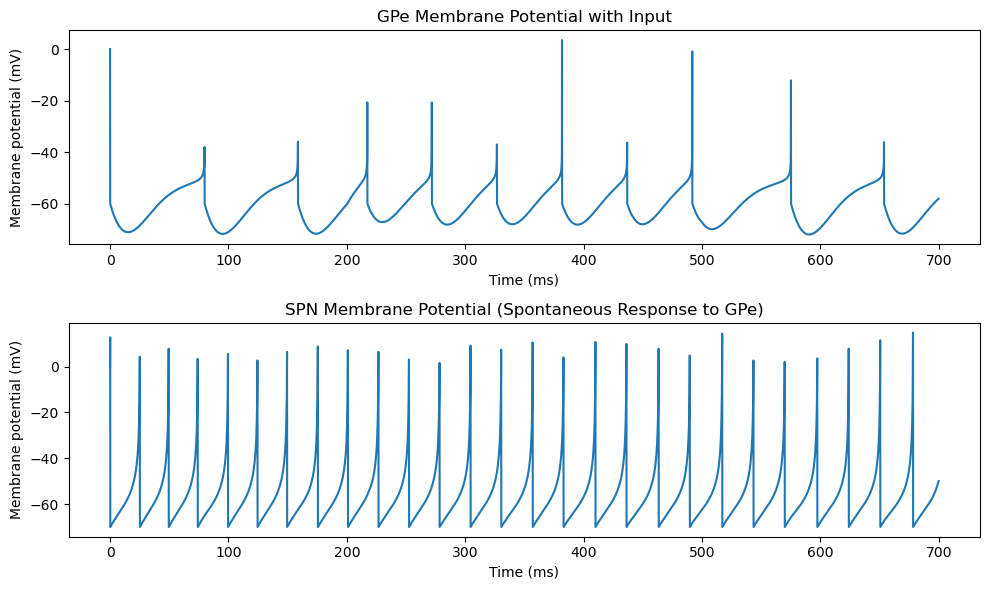

In [1]:
from simulation_runner_syn import run_simulation_with_input, plot_results_with_input, plot_connectivity
from brian2 import *

gpe_params_file = './params_ref/GPe_T1_1.json'
spn_params_file = './params_ref/STN_1.json'

# Define synapse parameters
synapse_params = {
    'w': 0.08*nS,
    'tau_syn': 8*ms,
    'E_GABA': -84*mV,
    'delay': 1*ms
}

# Example usage
N_GPe = 30  # Number of GPe neurons
N_SPN = 30   # Number of SPN neurons

# Run the simulation
results = run_simulation_with_input(
    N_GPe,
    N_SPN,
    gpe_params_file,
    spn_params_file,
    synapse_params,
    'GPe', 
    'STN', 
    "GPe_STN"
)

plot_results_with_input(results)

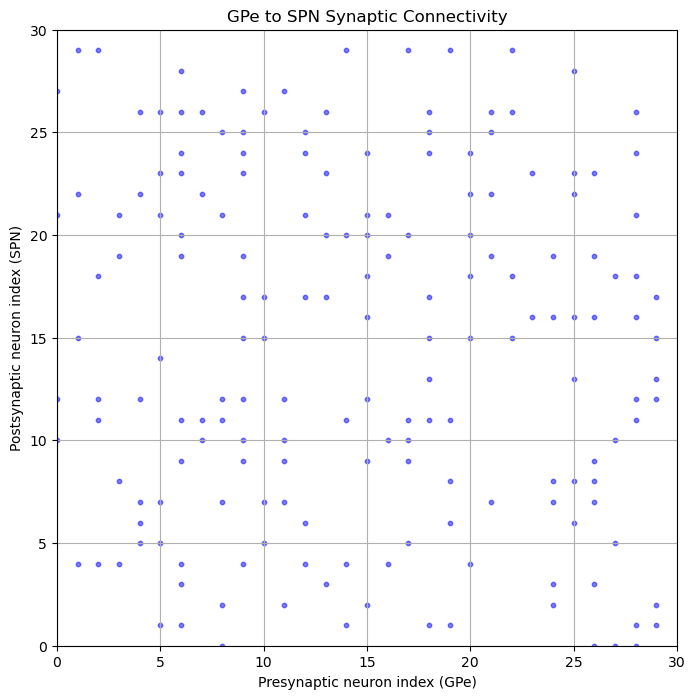

In [2]:
plot_connectivity(results['synapse'], N_GPe, N_SPN, title='GPe to SPN Synaptic Connectivity')